# Deconvolution of 10x Visium single cell data

## 1. Load libraries and h5ad file

In [ ]:
# If needed for installation of tangram (MacOS) uncomment and run or run in terminal without !
# !pip install torch torchvision torchaudio
# !pip install tangram-sc

In [72]:
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tangram as tg

%matplotlib inline

In [73]:
# Check the path you are working from
!pwd

/Users/thorsten/code/ThorstenCodes/Bioinformatics_TK/Projects/Spatial Transcriptomics/Project_1/dataset2_python


In [75]:
# Change the path for easier navigation through the project
%cd '/Users/thorsten/code/ThorstenCodes/Bioinformatics_TK/Projects/Spatial Transcriptomics/Project_1/dataset2_python/'

/Users/thorsten/code/ThorstenCodes/Bioinformatics_TK/Projects/Spatial Transcriptomics/Project_1/dataset2_python


In [76]:
# load preprocessed spatial data
adata_st = sc.read_h5ad('./results/preprocessed.h5ad')

In [77]:
# Download a reference single cell dataset (fully annotated) for Tangram annotation and deconvolution
!wget -O ./data/Reference_scRNA_Colon/ 'https://singlecell.broadinstitute.org/single_cell/data/public/SCP1891/spatially-defined-multicellular-functional-units-in-colorectal-cancer-revealed-from-single-cell-and-spatial-transcriptomics?filename=scRNAseq.h5ad'

zsh:1: no matches found: https://singlecell.broadinstitute.org/single_cell/data/public/SCP1891/spatially-defined-multicellular-functional-units-in-colorectal-cancer-revealed-from-single-cell-and-spatial-transcriptomics?filename=scRNAseq.h5ad


In [78]:
# load reference dataset for colon (for cluster annnotation with tangram)
adata_sc = sc.read_h5ad('./data/Reference_scRNA_Colon/colon_reference.h5ad')

## 2.1  Unsupervised Deconvolution using Tangram

In [79]:
adata_st.obs.head(5)

,in_tissue,array_row,array_col,spot,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,n_counts,n_genes,Clusters
AAACCGGGTAGGTACC-1,1,42,28,a,5096,8.536407,21597.0,9.980356,22.174376,31.499745,41.209427,55.169699,601.0,6.400258,2.782794,21597.0,5096,1
AAACCGTTCGTCCAGG-1,1,52,42,a,4795,8.475538,19144.0,9.859797,21.165901,31.372754,41.506477,55.343711,633.0,6.452049,3.306519,19144.0,4795,4
AAACCTCATGAAGTTG-1,1,37,19,a,3387,8.127995,11459.0,9.346618,29.112488,38.415219,47.962300,61.855310,613.0,6.419995,5.349507,11459.0,3387,0
AAACGAGACGGTTGAT-1,1,35,79,a,3714,8.220134,10961.0,9.302190,20.655050,29.176170,39.211751,55.104461,456.0,6.124683,4.160204,10961.0,3714,3
AAACTGCTGGCTCCAA-1,1,45,67,a,4360,8.380457,15037.0,9.618336,22.052271,30.784066,40.406996,54.625258,350.0,5.860786,2.327592,15037.0,4360,4


In [81]:
adata_sc.obs.head()

,Chemistry,DOB,Date,Flowcell,Gender,Hashed,Index,Lane,Model,SampleID,State,cluster,labels,compartment,tdTomato,cluster_short,coarseState
AKPTV5_V2_AAAGATGCACGGACAA,SC3Pv2,2019-08-26,2020-02-20,H55F7CCX2,M,True,SI-GA-A12,2,AKPTV,AKPTV5_V2,malignant (9weeks),Epi01 (Dysplastic Stem Like),Epi,epithelial,0.0,Epi01,malignant
AKPTV5_V2_AACCGCGTCGAGCCCA,SC3Pv2,2019-08-26,2020-02-20,H55F7CCX2,M,True,SI-GA-A12,2,AKPTV,AKPTV5_V2,malignant (9weeks),Epi01 (Dysplastic Stem Like),Epi,epithelial,1.0,Epi01,malignant
AKPTV5_V2_AAGGCAGTCACATAGC,SC3Pv2,2019-08-26,2020-02-20,H55F7CCX2,M,True,SI-GA-A12,2,AKPTV,AKPTV5_V2,malignant (9weeks),Epi01 (Dysplastic Stem Like),Epi,epithelial,0.0,Epi01,malignant
AKPTV5_V2_ACTGAGTTCAAAGACA,SC3Pv2,2019-08-26,2020-02-20,H55F7CCX2,M,True,SI-GA-A12,2,AKPTV,AKPTV5_V2,malignant (9weeks),Epi01 (Dysplastic Stem Like),Epi,epithelial,0.0,Epi01,malignant
AKPTV5_V2_AGGCCACAGCTCTCGG,SC3Pv2,2019-08-26,2020-02-20,H55F7CCX2,M,True,SI-GA-A12,2,AKPTV,AKPTV5_V2,malignant (9weeks),Epi01 (Dysplastic Stem Like),Epi,epithelial,2.0,Epi01,malignant


In [80]:
adata_sc.obsm.keys()

KeysView(AxisArrays with keys: Epithelial_programs, X_umap, X_umap_Epithelial, X_umap_Immune, X_umap_Myeloid, X_umap_Stromal, X_umap_TNK)

In [82]:
# Check UMAP shape and datatype (needs to be a numpy array)
adata_sc.obsm['X_umap'].shape
print(type(adata_sc.obsm['X_umap']))
adata_sc.obsm['X_umap'] = np.array(adata_sc.obsm['X_umap'], dtype=float)
print(type(adata_sc.obsm['X_umap']))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


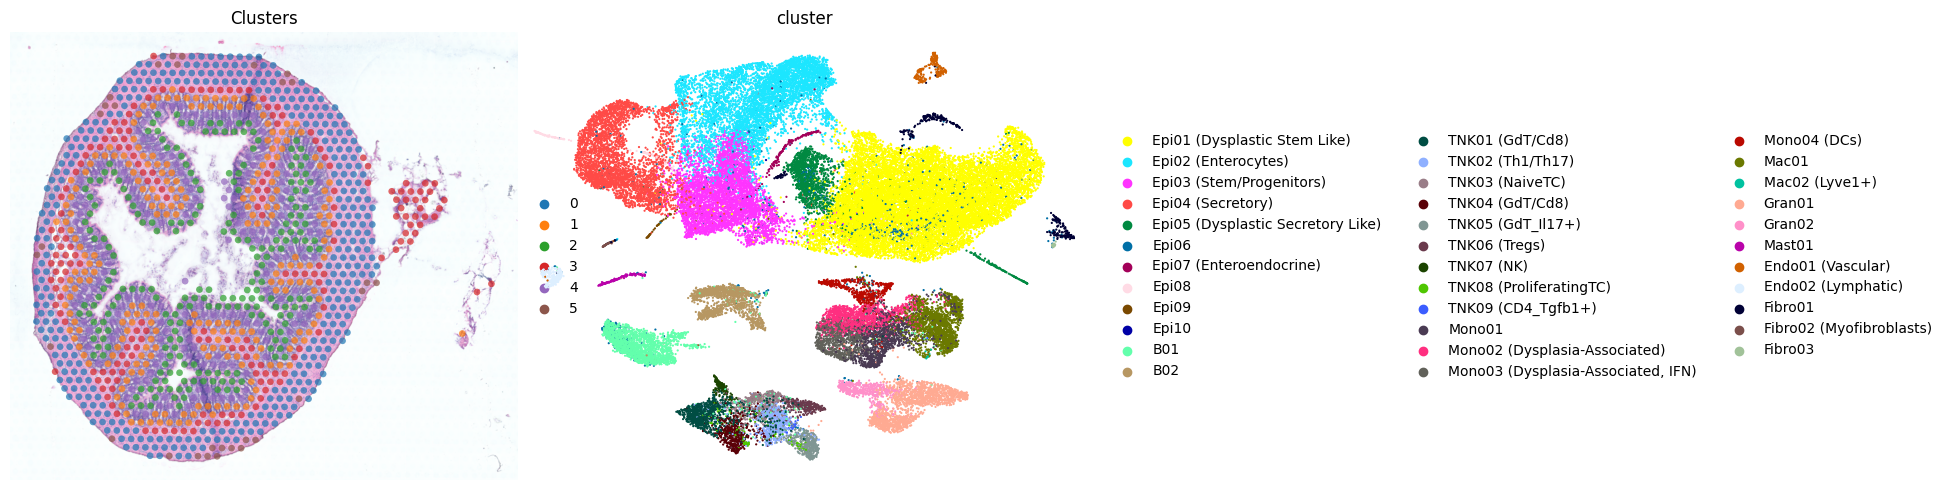

In [86]:
# Plot the UMAP of the reference dataset and the image with cluster of the spatial data
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sc.pl.spatial(
    adata_st, color="Clusters", alpha=0.7, frameon=False, show=False, ax=axs[0]
)
sc.pl.umap(
    adata_sc, color="cluster", size=10, frameon=False, show=False, ax=axs[1]
)
plt.tight_layout()


### Preprocessing for Alignment and mapping annotations of scRNAseq to spatial dataset

In [93]:
# We need to generate a set of training genes for tangram. This we derive from the scRNA reference. 
sc.tl.rank_genes_groups(adata_sc, groupby='cluster', use_raw=False)

In [97]:
#Convert the ranked gene groups in adata_sc.uns into a dataframe and select top 100 of each cluster
markers_df = pd.DataFrame(adata_sc.uns["rank_genes_groups"]["names"]).iloc[0:100, :]
markers_df

,Epi01 (Dysplastic Stem Like),Epi02 (Enterocytes),Epi03 (Stem/Progenitors),Epi04 (Secretory),Epi05 (Dysplastic Secretory Like),Epi06,Epi07 (Enteroendocrine),Epi08,Epi09,Epi10,...,Mac01,Mac02 (Lyve1+),Gran01,Gran02,Mast01,Endo01 (Vascular),Endo02 (Lymphatic),Fibro01,Fibro02 (Myofibroblasts),Fibro03
0,Hmgn1,2200002D01Rik,Cdx1,Spink4,Cd24a,Jchain,Cpe,Cd24a,Lgals9,Tesc,...,C1qb,Csf1r,Tyrobp,Tyrobp,Alox5ap,Pecam1,Mmrn1,Serping1,Rarres2,Cavin1
1,Ifitm3,Muc13,Pycard,Hepacam2,Ramp1,Igkc,Selenom,Selenom,Prap1,Maged1,...,C1qc,C1qc,S100a9,Msrb1,Cpa3,Ramp2,Cavin2,Pcolce,Flna,Gas6
2,Sox4,Muc3,Uqcr10,Ramp1,Selenom,Igha,Celf3,Ltc4s,Dbi,Cdkn2a,...,C1qa,Fxyd2,Il1b,Ninj1,Ms4a2,Crip2,Fgl2,Serpinh1,Cavin3,Myrf
3,Prdx2,Prdx6,Ppp1r1b,Ccl6,Guca2b,Cd79a,Rundc3a,Espn,Tm6sf2,Rab4a,...,Aif1,Pf4,Cebpb,Clec4d,Fcer1a,Esam,Cldn5,Rcn3,Rgs10,Upk3b
4,Ly6e,Cox6a1,Adh1,Hsd11b2,Spint2,Mzb1,Ddc,Dclk1,Tm4sf5,Lmo2,...,Tyrobp,Mgl2,Hdc,Cebpb,Lat2,Cd34,Timp3,C1s1,Serpinh1,Cavin3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Casp6,Ildr1,Myb,B3gnt5,Drap1,Ckap4,Prune2,Tmem176b,Gata6,3632451O06Rik,...,Lat2,Selplg,Hcst,Ccdc126,Camk1,Oaz2,Pros1,Rab34,Lxn,Fgf9
96,Hnrnpab,Hnf4a,Gucy2c,Spdef,Nhsl1,Reep5,Gdap1l1,Gucy2c,Misp,Fam118a,...,Pla2g7,Fos,Chil1,Sh2b2,Gpsm3,Nid1,Tmem109,Entpd2,Timp2,Rdx
97,Psma7,Plekhb2,Atp5j2,Tspan3,Sidt1,Kcnmb4os2,Scgn,Man1a,Ctnnd1,Nap1l1,...,Rab3il1,H2-Aa,Fpr1,Pilra,Lyl1,Fli1,Dusp3,Spon2,Cdc42ep3,Cdon
98,Ubb,H2-Q2,Plcb3,Tmco3,Gne,Tspan13,Apobec2,Ffar3,Oat,Slc25a32,...,Lamp1,Rgs10,Entpd1,Gm20406,Coro1a,Bnip2,Plpp1,Tmem176a,Adamdec1,Cald1


In [103]:
# Pivot list into long format (.(melt), generates a dataframe with column variable and value, thats why value.values)
# and remove duplicate names with (np.unique(values)), convert it into a list 
markers = list(np.unique(markers_df.melt().value.values))
(len(markers)

1837


In [105]:
# Use tangram pp_adatas to prepare data for training
# genes= is a list of genes provided from user which shall be used as training genes
# Annotates training genes in both datasets into .uns as training_genes (see below) in the same order
# If gene is not present or not expressed in both datasets it is removed from training_gens 
# Gene names are converted to lowercase to get rid of inconsistent capitalization (turn off with gene_to_lowercase = False)
tg.pp_adatas(adata_sc, adata_st, genes=markers)

INFO:root:1403 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:11509 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


1403 training genes are present in both dataset from the 1837 initally provided ! 

In [119]:
# Quick check that in the .uns annData the 'training genes' were added and that the list is indeed 1403 genes long.
print(adata_sc.uns.keys())
print(adata_st.uns.keys())
print(len(adata_sc.uns['training_genes']))
print(len(adata_st.uns['training_genes']))

odict_keys(['cluster_colors', 'rank_genes_groups', 'training_genes', 'overlap_genes'])
dict_keys(['Clusters', 'hvg', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'spot_colors', 'umap', 'Clusters_colors', 'training_genes', 'overlap_genes'])
1403
1403


In [120]:
# Now we train the model to find the best spatial alignment to the scRNA-profiles
ad_map = tg.map_cells_to_space(adata_sc, adata_st,
    mode="cells",
    density_prior='rna_count_based',
    num_epochs=500,
    device='cpu',
)



INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1403 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.527, KL reg: 0.005
Score: 0.747, KL reg: 0.000
Score: 0.757, KL reg: 0.000
Score: 0.759, KL reg: 0.000
Score: 0.760, KL reg: 0.000


INFO:root:Saving results..


The output of the above alignment is a new `AnnData` structure saved in `ad_map`: <br>
`ad_map.obs` contains all metadata of adata_sc.<br>
`ad_map.var` contains the metadata of adata_st <br>
`ad_map.uns` contains a dataframe with various information about the training (keys are `training_genes_df` and `training_history`): <br>


In [125]:
ad_map.uns

odict_keys(['train_genes_df', 'training_history'])